In [49]:
# Step1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [50]:
# STEP 2: Load Dataset 
df = pd.read_csv("data.csv", on_bad_lines='skip')
print(df.head())
print(df.info())
print(df['strength'].value_counts())

      password  strength
0     kzde5577         1
1     kino3434         1
2    visi7k1yr         1
3     megzy123         1
4  lamborghin1         1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 669640 entries, 0 to 669639
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   password  669639 non-null  object
 1   strength  669640 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 10.2+ MB
None
strength
1    496801
0     89702
2     83137
Name: count, dtype: int64


In [51]:
# STEP 3: Pre-Processing
#Convert Strength labels
df['strength'] = df['strength'].map({0:'Weak', 1:'Medium', 2:'Strong'})
#Remove missing values
df.dropna(inplace=True)


In [52]:
# STEP 4: Feature Engineering (NO ERROR VERSION)
df['length'] = df['password'].apply(len)

df['digits'] = df['password'].apply(
    lambda x: sum(1 for c in x if c.isdigit())
)

df['upper'] = df['password'].apply(
    lambda x: sum(1 for c in x if c.isupper())
)

df['lower'] = df['password'].apply(
    lambda x: sum(1 for c in x if c.islower())
)

df['special'] = df['password'].apply(
    lambda x: sum(1 for c in x if not c.isalnum())
)

In [53]:
# STEP 5: Prepare X and y
X = df[['length','digits','upper','lower','special']]
y = df['strength']

In [54]:
print(X.shape)
print(y.shape)

(669639, 5)
(669639,)


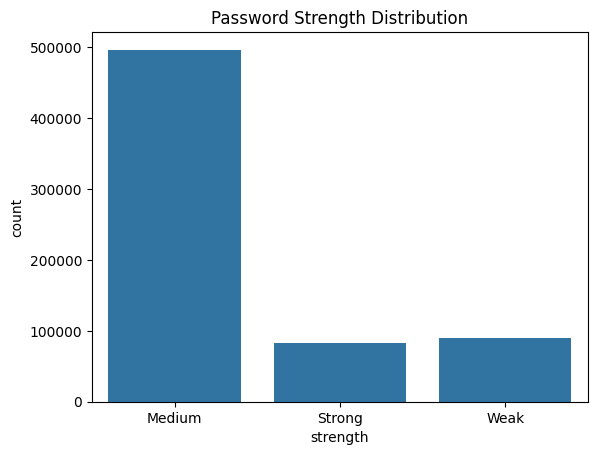

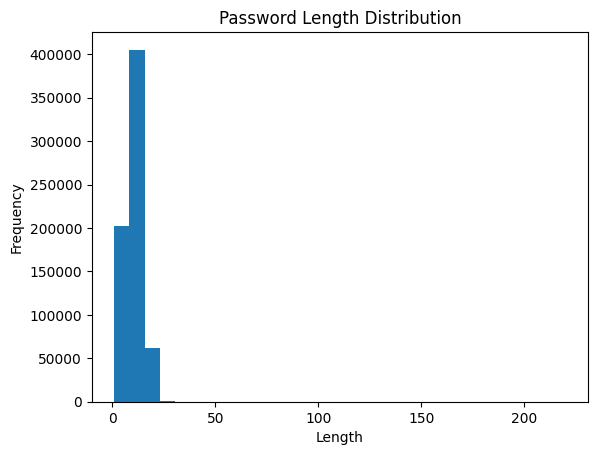

In [55]:
# STEP 6: Data Visualization (ERROR-FREE)
# Password Strength count
sns.countplot(x='strength', data=df)
plt.title("Password Strength Distribution")
plt.show()
# Password Length Distribution
plt.hist(df['length'], bins=30)
plt.title("Password Length Distribution")
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.show()


In [56]:
# STEP 7: Class Balancing using SMOTE
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

print("After Balancing:")
print(pd.Series(y).value_counts())


After Balancing:
strength
Medium    496801
Strong    496801
Weak      496801
Name: count, dtype: int64


In [57]:
# STEP 8: Normalization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)


In [58]:
# STEP 9: Train-Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [59]:
# STEP 10: Model Training

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Train model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# Prediction
lr_pred = lr_model.predict(X_test)

# Accuracy
print("Logistic Regression Accuracy:",
      accuracy_score(y_test, lr_pred))

# Classification Report
print(classification_report(
    y_test,
    lr_pred,
    target_names=['Weak', 'Medium', 'Strong']
))





Logistic Regression Accuracy: 0.9999899356215257
              precision    recall  f1-score   support

        Weak       1.00      1.00      1.00     99012
      Medium       1.00      1.00      1.00     99175
      Strong       1.00      1.00      1.00     99894

    accuracy                           1.00    298081
   macro avg       1.00      1.00      1.00    298081
weighted avg       1.00      1.00      1.00    298081



In [60]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

svm_pred = svm_model.predict(X_test)

print("SVM Accuracy:",
      accuracy_score(y_test, svm_pred))

print(classification_report(
    y_test, svm_pred,
    target_names=['Weak','Medium','Strong']
))

SVM Accuracy: 1.0
              precision    recall  f1-score   support

        Weak       1.00      1.00      1.00     99012
      Medium       1.00      1.00      1.00     99175
      Strong       1.00      1.00      1.00     99894

    accuracy                           1.00    298081
   macro avg       1.00      1.00      1.00    298081
weighted avg       1.00      1.00      1.00    298081



In [61]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

dt_pred = dt_model.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_pred))
print(classification_report(y_test, dt_pred,
    target_names=['Weak','Medium','Strong']))                 


Decision Tree Accuracy: 1.0
              precision    recall  f1-score   support

        Weak       1.00      1.00      1.00     99012
      Medium       1.00      1.00      1.00     99175
      Strong       1.00      1.00      1.00     99894

    accuracy                           1.00    298081
   macro avg       1.00      1.00      1.00    298081
weighted avg       1.00      1.00      1.00    298081



In [62]:
from sklearn.metrics import precision_score, recall_score, f1_score

results = []

def evaluate(name, model):
    pred = model.predict(X_test)
    results.append([
        name,
        accuracy_score(y_test, pred),
        precision_score(y_test, pred, average='macro'),
        recall_score(y_test, pred, average='macro'),
        f1_score(y_test, pred, average='macro')
    ])

evaluate("Logistic Regression", lr_model)
evaluate("SVM", svm_model)
evaluate("Decision Tree", dt_model)

results_df = pd.DataFrame(
    results,
    columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score"]
)

print(results_df)


                 Model  Accuracy  Precision   Recall  F1-Score
0  Logistic Regression   0.99999    0.99999  0.99999   0.99999
1                  SVM   1.00000    1.00000  1.00000   1.00000
2        Decision Tree   1.00000    1.00000  1.00000   1.00000


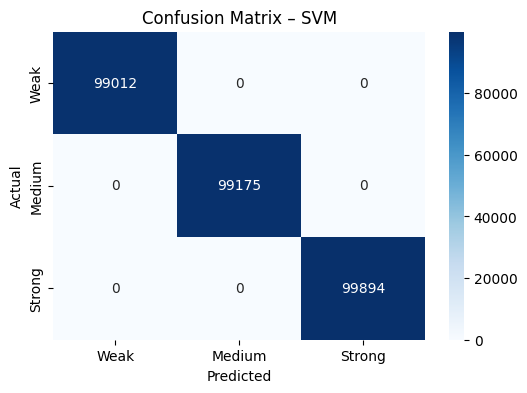

In [63]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, svm_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Weak','Medium','Strong'],
            yticklabels=['Weak','Medium','Strong'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix – SVM")
plt.show()



In [64]:
# STEP 12: Save the Best Model (Linear SVM)

import pickle

# Save trained model
with open("password_strength_model.pkl", "wb") as f:
    pickle.dump(svm_model, f)

# Save scaler (IMPORTANT)
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

print("Model and scaler saved successfully!")




Model and scaler saved successfully!


In [65]:
import joblib

model = joblib.load("password_strength_model.pkl")
scaler = joblib.load("scaler.pkl")


In [66]:
# STEP 13: Test the Model
import pandas as pd

def check_password(pwd):
    data = pd.DataFrame([[
        len(pwd),
        sum(c.isdigit() for c in pwd),
        sum(c.isupper() for c in pwd),
        sum(c.islower() for c in pwd),
        sum(not c.isalnum() for c in pwd)
    ]], columns=[
        'length',
        'digits',
        'upper',
        'lower',
        'special'
    ])
    data = scaler.transform(data)
    return model.predict(data)[0]


print(check_password("xyz@123"))



Weak


In [67]:
import pickle
pickle.dump(scaler, open("scaler.pkl", "wb"))

In [71]:
# Step 14: Deployment can be done using Flask
from flask import Flask, request, jsonify
import pickle
import pandas as pd

# Load trained model and scaler
model = pickle.load(open("password_strength_model.pkl", "rb"))
scaler = pickle.load(open("scaler.pkl", "rb"))

app = Flask(__name__)

@app.route('/predict', methods=['POST'])
def predict():
    pwd = request.json['password']

    # Feature extraction
    data = pd.DataFrame([[
        len(pwd),
        sum(c.isdigit() for c in pwd),
        sum(c.isupper() for c in pwd),
        sum(c.islower() for c in pwd),
        sum(not c.isalnum() for c in pwd)
    ]], columns=['length','digits','upper','lower','special'])

    # Scaling + Prediction
    data = scaler.transform(data)
    result = model.predict(data)[0]

    return jsonify({"strength": result})

if __name__ == "__main__":
    app.run(debug=False)






 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit


127.0.0.1 - - [17/Jan/2026 10:48:22] "GET /predict HTTP/1.1" 405 -
127.0.0.1 - - [17/Jan/2026 10:48:37] "GET /predict HTTP/1.1" 405 -
127.0.0.1 - - [17/Jan/2026 10:48:44] "GET / HTTP/1.1" 404 -
127.0.0.1 - - [17/Jan/2026 10:48:55] "GET / HTTP/1.1" 404 -
